In [13]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from langgraph.graph.message import BaseMessage, add_messages
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage
from typing import Annotated, List, TypedDict
from dotenv import load_dotenv

load_dotenv()

True

In [20]:
model = ChatOpenAI(
    model="gpt-3.5-turbo"
)

In [15]:
class ChatState(TypedDict):

    messages: Annotated[List[BaseMessage], add_messages]

In [16]:
def chat_node(state: ChatState):

   messages = state["messages"]
   response = model.invoke(messages)
   
   return {"messages": [response]}

In [17]:
graph = StateGraph(ChatState)

graph.add_node("chat_node", chat_node)

graph.add_edge(START, "chat_node")
graph.add_edge("chat_node", END)

chatbot = graph.compile()

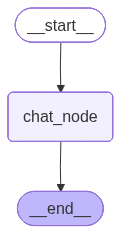

In [18]:
chatbot

In [21]:
initial_state = {
    "messages": HumanMessage(content="What is the capital of india")
}

chatbot.invoke(initial_state)

{'messages': [HumanMessage(content='What is the capital of india', additional_kwargs={}, response_metadata={}, id='f66f6216-fbb3-4a5c-8e5b-7b24fc91ad5c'),
  AIMessage(content='The capital of India is New Delhi.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 13, 'total_tokens': 21, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CvjpFLtRSIBji1JjsSTHsT7pha6E8', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b9dac-73e9-75b1-9832-7006fa439005-0', usage_metadata={'input_tokens': 13, 'output_tokens': 8, 'total_tokens': 21, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 

In [28]:
while True:

    user_input = input("Human : Type your message Here")
    print(f"User: {user_input}")
    if user_input.strip().lower() in [ "exit","bye"]:
        break
    result = chatbot.invoke({"messages": HumanMessage(content=user_input)})
    print(f"AI: {result["messages"][-1].content}")

User: Hi
AI: Hello! How can I assist you today?
User: What is the Capital of india?
AI: The capital of India is New Delhi.
User: my name is Srinivasulu
AI: Hello Srinivasulu, how can I assist you today?
User: what is my name
AI: I'm sorry, I cannot provide your name as I do not have access to that information.
User: what is 10 plus 20
AI: 10 plus 20 is 30.
User: add 50 to the result
AI: The new result is the previous result + 50.
User: exit


## Adding memory to the above Chatbot

In [29]:
from langgraph.checkpoint.memory import MemorySaver

checkpointer = MemorySaver()

In [30]:
graph = StateGraph(ChatState)

graph.add_node("chat_node", chat_node)

graph.add_edge(START, "chat_node")
graph.add_edge("chat_node", END)

chatbot = graph.compile(checkpointer=checkpointer)

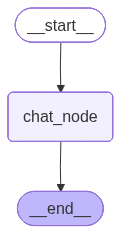

In [31]:
chatbot

In [33]:
thread_id = '1'
while True:
    user_input = input("Type Your Message:")
    print(f"User: {user_input}")

    if user_input.strip().lower() in ["exit", "bye"]:
        break
    config = {"configurable": {"thread_id": thread_id}}
    response = chatbot.invoke({"messages": HumanMessage(content=user_input)}, config=config)
    print(f"AI: {response["messages"][-1].content}")
    


User: Hi My name is Srinivasulu
AI: Hello Srinivasulu, nice to meet you! How can I assist you today?
User: What is my name
AI: Your name is Srinivasulu.
User: What is 10 plus 100
AI: 10 plus 100 equals 110.
User: multiply th result with 5
AI: 110 multiplied by 5 is equal to 550.
User: exit


In [34]:
chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='Hi My name is Srinivasulu', additional_kwargs={}, response_metadata={}, id='5f40bcbb-0aed-477b-8237-7e3d67484ec7'), AIMessage(content='Hello Srinivasulu, nice to meet you! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 15, 'total_tokens': 33, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Cvkxri7x9kXJc1zmhxuKTeS4boWwt', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b9def-4428-7a80-bc88-c7d0f5552292-0', usage_metadata={'input_tokens': 15, 'output_tokens': 18, 'total_tokens': 33, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'o